In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
class Perceptron:
    def __init__(self, activation='linear', input_size=1):
        self.weight = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.activation_name = activation
        
        if activation == 'linear':
            self.activation = self.linear
        elif activation == 'sigmoid':
            self.activation = self.sigmoid
        elif activation == 'tanh':
            self.activation = self.tanh
        elif activation == 'relu':
            self.activation = self.relu
        elif activation == 'softmax':
            self.activation = self.softmax
        else:
            raise ValueError("Unsupported activation function")
        
        print(f"[{activation}] weight: {self.weight}, bias: {self.bias}")
    
    def linear(self, x):
        return x
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        return np.tanh(x)
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def softmax(self, x):
        exp_vals = np.exp(np.vstack([x, np.zeros_like(x)]))
        sum_exp = np.sum(exp_vals, axis=0)
        return exp_vals / sum_exp
    
    def forward(self, x):
        z = np.dot(self.weight, x) + self.bias
        return self.activation(z)

[linear] weight: [-1.62363529], bias: 0.9281953595026687
[sigmoid] weight: [-1.99144024], bias: 1.126940329654254
[tanh] weight: [0.30652295], bias: 0.6015653345308436
[relu] weight: [0.53411378], bias: -0.6399597071001545
[softmax] weight: [0.68867368], bias: -0.7724878545976359


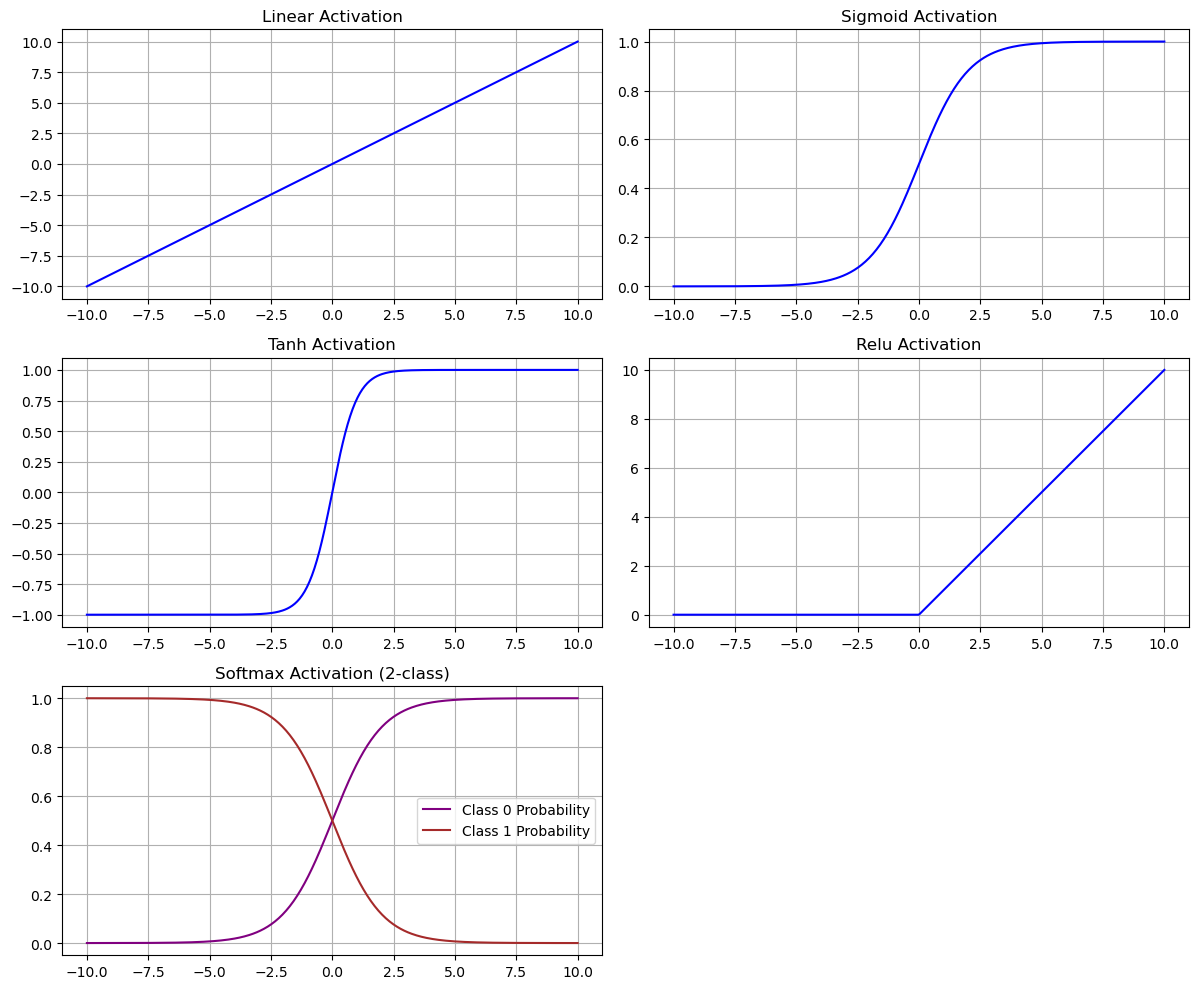

In [57]:
x_range = np.linspace(-10, 10, 400)


activations = ['linear', 'sigmoid', 'tanh', 'relu', 'softmax']
perceptrons = {act: Perceptron(activation=act) for act in activations}

plt.figure(figsize=(12, 10))

for i, act in enumerate(activations, 1):
    plt.subplot(3, 2, i)
    p = perceptrons[act]
    
    if act == 'softmax':
        y = p.activation(x_range)
        plt.plot(x_range, y[0], label='Class 0 Probability', color='purple')
        plt.plot(x_range, y[1], label='Class 1 Probability', color='brown')
        plt.title(f"{act.capitalize()} Activation (2-class)")
        plt.legend()
    else:
        y = p.activation(x_range)
        plt.plot(x_range, y, label=act.capitalize(), color='blue')
        plt.title(f"{act.capitalize()} Activation")
    
    plt.grid(True)

plt.subplot(3,2,6).axis('off')  

plt.tight_layout()
plt.show()

In [58]:
a = float(input("\nEnter a value for input neuron: "))
input_array = np.array([a])

print("\nPerceptron outputs for input =", a)
for act in activations:
    p = perceptrons[act]
    out = p.forward(input_array)
    if act == 'softmax':
        print(f"{act.capitalize()} Output (class probabilities): {out}")
    else:
        print(f"{act.capitalize()} Output: {out}")


Enter a value for input neuron:  10



Perceptron outputs for input = 10.0
Linear Output: -15.308157535646535
Sigmoid Output: 6.92961151258986e-09
Tanh Output: 0.9986944037196663
Relu Output: 4.701178057113322
Softmax Output (class probabilities): [[0.99779374]
 [0.00220626]]
